## Classifying with k-Nearest Neighbors

- Pros: High accuracy, insensitive to outliers, no assumptions about data
- Cons: Computationally expensive, requires a lot of memory
- Works with: Numeric values, nominal values

In [1]:
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Implement KNN

In [2]:
# k-Nearest Neighbors algorithm
# For every point in our dataset:
#     calculate the distance between inX and the current point
#     sort the distances in increasing order
#     take k items with lowest distances to inX
#     find the majority class among these items
#     return the majority class as our prediction for the class of inX
def classify0(inX, dataSet, labels, k):
    # Distance calculation
    diffMat = dataSet - inX
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    # Voting with lowest k distances
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # Sort dictionary
    sortedClassCount = sorted(classCount.items(), key=lambda x: x[1],
                              reverse=True)
    return sortedClassCount[0][0]

### Experiment 1: Toy dataset

In [3]:
def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = np.array(['A', 'A', 'B', 'B'])
    return group, labels

In [4]:
group, labels = createDataSet()

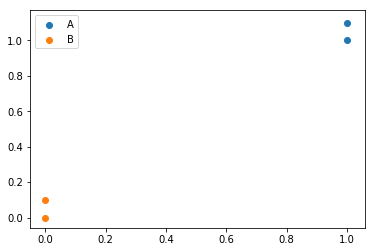

In [5]:
plt.figure()
for label in ["A", "B"]:
    plt.scatter(group[labels == label, 0], group[labels == label, 1],
                label=label)
plt.legend()
plt.show()

In [6]:
classify0([0, 0], group, labels, 3)

'B'

## Experiment 2: Dating site dataset

In [7]:
# Text record to NumPy parsing code
def file2matrix(filename):
    fr = open(filename)
    arrayOfLines = fr.readlines()
    # Get number of lines in file
    numberOfLines = len(arrayOfLines)
    # Create NumPy matrix to return
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    # Parse line to a list
    for line in arrayOfLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0: 3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, np.array(classLabelVector)

In [8]:
# Feature 1: Number of frequent flyer miles earned per year
# Feature 2: Percentage of time spent playing video games
# Feature 3: Liters of ice cream consumed per week
# Output: largeDoses-3/smallDoses-2/didntLike-1
datingDataMat, datingLabels = file2matrix("datingTestSet2.txt")

In [9]:
datingDataMat[:5]

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       [7.5136000e+04, 1.3147394e+01, 4.2896400e-01],
       [3.8344000e+04, 1.6697880e+00, 1.3429600e-01]])

In [10]:
datingLabels[:5]

array([3, 2, 1, 1, 1])

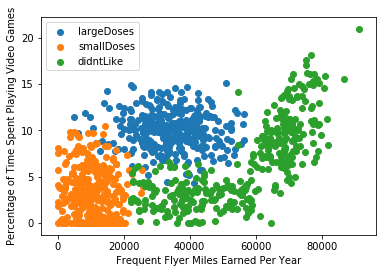

In [11]:
plt.figure()
for value, label in zip([3, 2, 1], ["largeDoses", "smallDoses", "didntLike"]):
    plt.scatter(datingDataMat[datingLabels == value, 0],
                datingDataMat[datingLabels == value, 1], label=label)
plt.xlabel("Frequent Flyer Miles Earned Per Year")
plt.ylabel("Percentage of Time Spent Playing Video Games")
plt.legend()
plt.show()

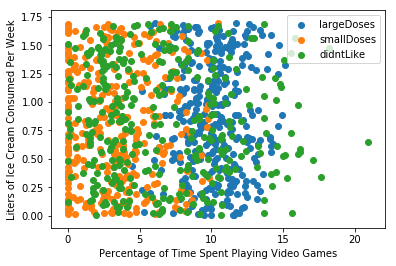

In [12]:
plt.figure()
for value, label in zip([3, 2, 1], ["largeDoses", "smallDoses", "didntLike"]):
    plt.scatter(datingDataMat[datingLabels == value, 1],
                datingDataMat[datingLabels == value, 2], label=label)
plt.xlabel("Percentage of Time Spent Playing Video Games")
plt.ylabel("Liters of Ice Cream Consumed Per Week")
plt.legend()
plt.show()

In [13]:
# Data-normalizing code
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(dataSet.shape)
    normDataSet = dataSet - minVals
    normDataSet = normDataSet / ranges
    return normDataSet, ranges, minVals

In [14]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [15]:
normMat[:5]

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       [0.82320073, 0.62848007, 0.25248929],
       [0.42010233, 0.07982027, 0.0785783 ]])

In [16]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [17]:
minVals

array([0.      , 0.      , 0.001156])

In [18]:
# Classifier testing code for dating site
def datingClassTest():
    hoRatio = 0.10  # test set
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:, :],
                                     datingLabels[numTestVecs:], 3)
        # print("the classifier came back with: %d, the real answer is: %d"
        #       % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))

In [19]:
datingClassTest()

the total error rate is: 0.050000


In [20]:
# Dating site predictor function
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr - minVals) / ranges, normMat,
                                 datingLabels, 3)
    print("You will probably like this person: %s"
          % resultList[classifierResult - 1])

In [21]:
classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year?0.5
You will probably like this person: in small doses


### Experiment 3: Handwriting dataset

In [22]:
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect

In [23]:
testVector = img2vector('testDigits/0_13.txt')

In [24]:
testVector[0, 0: 31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
testVector[0, 32: 63]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
# Handwritten digits testing code
def handwritingClassTest():
    hwLabels = []
    # Get contents of directory
    trainingFileList = listdir("trainingDigits")
    m = len(trainingFileList)
    trainingMat = np.zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        # Process class num from filename
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i, :] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        # print("the classifier came back with: %d, the real answer is: %d"
        #       % (classifierResult, classNumStr))
        if (classifierResult != classNumStr):
            errorCount += 1.0
    print("the total number of errors is: %d" % errorCount)
    print("the total error rate is: %f" % (errorCount / float(mTest)))

In [27]:
handwritingClassTest()

the total number of errors is: 10
the total error rate is: 0.010571
